In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Configuration
API_KEY = 'f00c38e0279b7bc85480c3fe775d518c' # Replace with your OpenWeatherMap API key
CITY = 'Mumbai'
UNITS = 'metric'  # Use 'imperial' for Fahrenheit


In [8]:
# Fetch 5-day forecast data from OpenWeatherMap
def fetch_weather_data(city):
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units={UNITS}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error fetching data: {response.status_code} - {response.text}")

In [9]:
def extract_weather_info(data):
    weather_list = data['list']
    datetimes = []
    temps = []
    humidity = []

    for entry in weather_list:
        datetimes.append(entry['dt_txt'])
        temps.append(entry['main']['temp'])
        humidity.append(entry['main']['humidity'])

    return datetimes, temps, humidity

In [10]:
def plot_weather_data(datetimes, temps, humidity):
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 6))

    # Temperature Plot
    plt.subplot(1, 2, 1)
    sns.lineplot(x=datetimes, y=temps, marker='o', color='red')
    plt.title('Temperature Forecast')
    plt.xlabel('DateTime')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)

    # Humidity Plot
    plt.subplot(1, 2, 2)
    sns.lineplot(x=datetimes, y=humidity, marker='o', color='blue')
    plt.title('Humidity Forecast')
    plt.xlabel('DateTime')
    plt.ylabel('Humidity (%)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

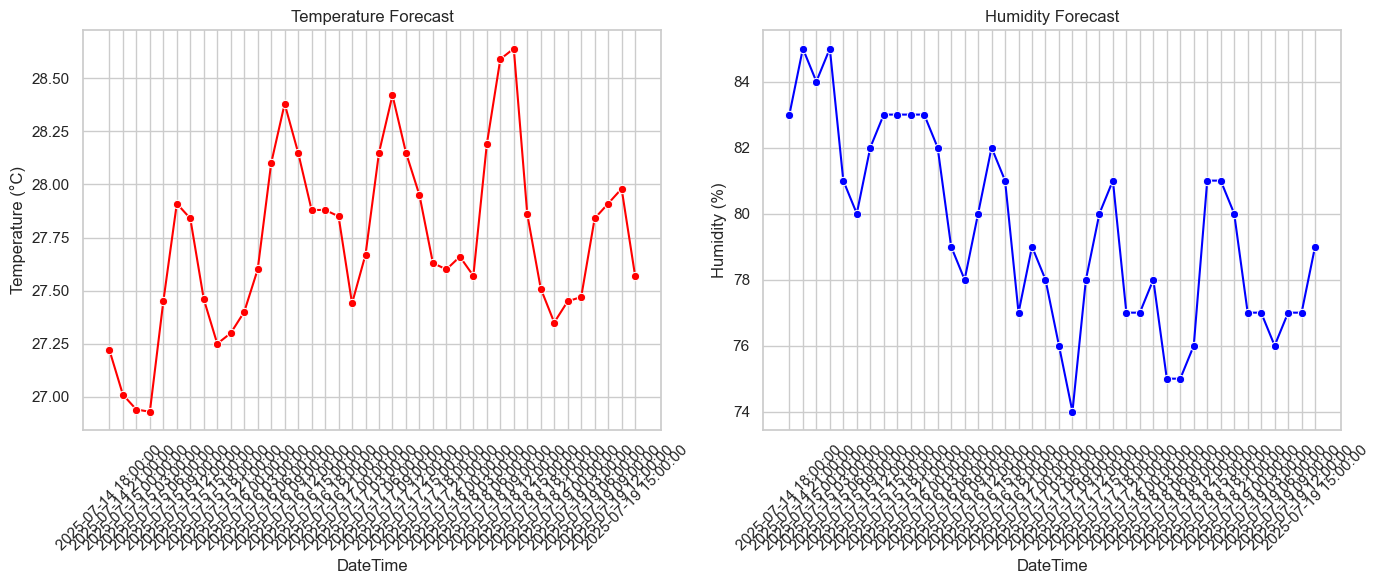

In [11]:
try:
    raw_data = fetch_weather_data(CITY)
    datetimes, temps, humidity = extract_weather_info(raw_data)
    plot_weather_data(datetimes, temps, humidity)
except Exception as e:
    print("❌ Error:", e)